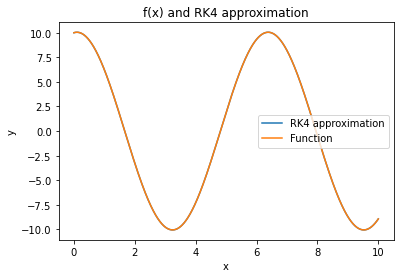

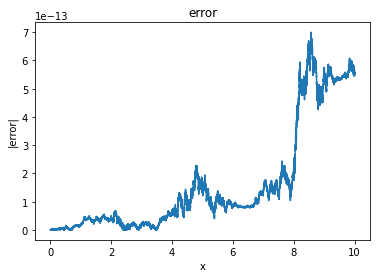

In [168]:
import math
import numpy as np
import matplotlib.pyplot as plt

def old_function(y,x):
    return -y

def new_function(y, x):
    return math.cos(x)-10*math.sin(x)

def rk4(dx, y0, x0, function):

    y = y0
    current_x = x0
    
    k1 = dx*function(y, current_x)
    
    k2 = dx*function(y + k1/ 2, current_x + dx / 2)
    
    k3 = dx*function(y + k2/ 2, current_x + dx / 2)
    
    k4 = dx*function(y + k3, current_x + dx)

    dydx = 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    y = y + dydx
    
    current_x = current_x + dx
        
    return y, current_x, dx

#local_error = (abs(rk4(dx, y0, yprime0, x0, x_vals[0])-rk4(dx/2, y0, yprime0, x0, x_vals[0])))

def solution(x):
    return 10*math.cos(x)+math.sin(x)
    
def adaptive_step(x0,y0,dx,function, tolerance, max_iter):
    h = dx
    iter = 0
    
    while(iter < max_iter):
        iter += 1
        y_new,x_new,h = rk4(dx,y0,x0,new_function)
    
        h_half = h/2
        x_half,y_half,h_half = rk4(.001,10,0,new_function)
        x_half,y_half,h_half = rk4(x_half,y_half,h_half,new_function)
    
        local_error = abs(y_new-y_half)
        
        if local_error > tolerance:
            h = 0.5 * (tolerance / local_error) ** (1 / 4)
            x = x_new+h
            y = y_new
        else:
            h = 0.9 * (tolerance / local_error) ** (1 / 5)points
            x = x_new
            y = y_new
    return x_new,y_new,h

tolerance = 10**(-12)
x = 0
y = 10
dx = 0.001
x_vals = []
y_vals = []
exact_vals = []
error = []

points = 10

iteration = 0
while(x < points):
    x,y,dx = adaptive_step(x,y,dx,new_function, tolerance, 10)
    x_vals.append(x)
    y_vals.append(y)
    exact_vals.append(solution(x))
    error.append(abs(exact_vals[iteration]-y_vals[iteration]))
    iteration += 1

plt.plot(x_vals,y_vals, label = 'RK4 approximation')
plt.plot(x_vals,exact_vals, label = 'Function')                      
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and RK4 approximation')
plt.legend()
plt.show()

plt.plot(x_vals,error)                      
plt.xlabel('x')
plt.ylabel('|error|')
plt.title('error')
plt.show()

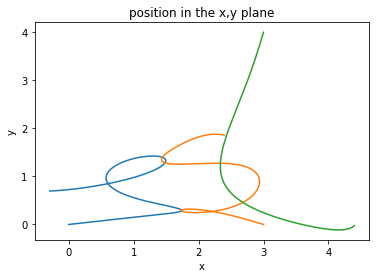

In [228]:
l = 1

r1 = 1*np.array((0,0,0), dtype=np.float64)
v1 = np.array((0,0,0), dtype=np.float64)

r2 = l*np.array((3,0,0), dtype=np.float64)
v2 = np.array((0,0,0), dtype=np.float64)

r3 = l*np.array((3,4,0), dtype=np.float64)
v3 = np.array((0,0,0), dtype=np.float64)

full_vector = np.array((*r1,*r2,*r3,*v1,*v2,*v3))


g = 1

def main_function(full_vector, t):
    r1 = full_vector[0:3]
    r2 = full_vector[3:6]
    r3 = full_vector[6:9]
    v1 = full_vector[9:12]
    v2 = full_vector[12:15]
    v3 = full_vector[15:18]
    
    m1 = 4
    m2 = 5
    m3 = 3

    f1 = - m2 * (r1 - r2) / (math.sqrt((r1[0] - r2[0])**2 + (r1[1] - r2[1])**2 + (r1[2] - r2[2])**2)**3) \
        - m3 * (r1 - r3) / (math.sqrt((r1[0] - r3[0])**2 + (r1[1] - r3[1])**2 + (r1[2] - r3[2])**2)** 3)

    f2 = - m1 * (r2 - r1) / (math.sqrt((r2[0] - r1[0])**2 + (r2[1] - r1[1])**2 + (r2[2] - r1[2])**2)**3) \
        - m3 * (r2 - r3) / (math.sqrt((r2[0] - r3[0])**2 + (r2[1] - r3[1])**2 + (r2[2] - r3[2])**2)**3)

    f3 = - m1 * (r3 - r1) / (math.sqrt((r3[0] - r1[0])**2 + (r3[1] - r1[1])**2 + (r3[2] - r1[2])**2)**3) \
         - m2 * (r3 - r2) / (math.sqrt((r3[0] - r2[0])**2 + (r3[1] - r2[1])**2 + (r3[2] - r2[2])**2)**3)


    return np.array(
        (
            v1[0], v1[1], v1[2],
            v2[0], v2[1], v2[2],
            v3[0], v3[1], v3[2],
            f1[0], f1[1], f1[2],
            f2[0], f2[1], f2[2],
            f3[0], f3[1], f3[2],
        )
    )



def rk4(dt, y0, t0, function):
    y = y0
    t = t0
    
    k1 = dt*function(y, t)
    
    k2 = dt*function(y + k1/ 2, t + dt / 2)
    
    k3 = dt*function(y + k2/ 2, t + dt / 2)
    
    k4 = dt*function(y + k3, t + dt)

    dydt = 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    y = y + dydt
    
    t = t + dt
        
    return y, t, dt

t = 0
dt = 0.0001
x_1vals = []
x_2vals = []
x_3vals = []
y_1vals = []
y_2vals = []
y_3vals = []

iter = 0

while(t < 10):
    iter += 1
    full_vector,t_new,h = rk4(dt,full_vector,t,main_function)
    #fill in the x vals with the values of the main function, not the full_vector
    x_1vals.append(full_vector[0])
    y_1vals.append(full_vector[1])
    x_2vals.append(full_vector[3])
    y_2vals.append(full_vector[4])
    x_3vals.append(full_vector[6])
    y_3vals.append(full_vector[7])
    t = t_new + dt


plt.plot(x_1vals,y_1vals)
plt.plot(x_2vals,y_2vals)
plt.plot(x_3vals,y_3vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('position in the x,y plane')
plt.show()